In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts


In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [6]:
# Display the DataFrame
pyber_data_df.head(50)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [7]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
# Create the Suburban city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [9]:
# Create the  Rural city DataFrames.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [10]:
# Technical Analysis Deliverable 1: A Summary DataFrame

In [11]:
# Get the number of rides for urban city type./
urban_ride_count = urban_cities_df.groupby(["type"]).count()["ride_id"]
urban_ride_count.head()

type
Urban    1625
Name: ride_id, dtype: int64

In [12]:
# Get the number of rides for suburban city type./
suburban_ride_count = suburban_cities_df.groupby(["type"]).count()["ride_id"]
suburban_ride_count.head()

type
Suburban    625
Name: ride_id, dtype: int64

In [13]:
# Get the number of rides for rural city type./
rural_ride_count = rural_cities_df.groupby(["type"]).count()["ride_id"]
rural_ride_count.head()

type
Rural    125
Name: ride_id, dtype: int64

In [14]:
urban_cities_df[urban_cities_df["city"] == "Lake Jonathanshire"]

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
76,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
154,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
185,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
196,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
277,Lake Jonathanshire,2019-04-06 11:30:32,16.84,6164453571846,5,Urban
329,Lake Jonathanshire,2019-03-21 00:18:34,37.95,8353656732934,5,Urban
497,Lake Jonathanshire,2019-01-28 00:07:00,5.67,9756573174778,5,Urban
693,Lake Jonathanshire,2019-01-24 12:24:22,34.65,3319117904437,5,Urban
712,Lake Jonathanshire,2019-03-24 16:27:49,14.94,1670908453476,5,Urban


In [15]:
# Get the number of drivers for urban city type. /
urban_drivers_count = city_data_df[city_data_df["type"]=='Urban'].groupby(["type"]).sum()["driver_count"]
urban_drivers_count


type
Urban    2405
Name: driver_count, dtype: int64

In [16]:
# Get the number of drivers for suburban city type./
suburban_drivers_count = city_data_df[city_data_df["type"]=='Suburban'].groupby(["type"]).sum()["driver_count"]
suburban_drivers_count

type
Suburban    490
Name: driver_count, dtype: int64

In [17]:
# Get the number of drivers for rural city type./
rural_drivers_count = city_data_df[city_data_df["type"]=='Rural'].groupby(["type"]).sum()["driver_count"]
rural_drivers_count

type
Rural    78
Name: driver_count, dtype: int64

In [18]:
# Get Total Fares for urban city type./
urban_total_fare = urban_cities_df.groupby(["type"]).sum()["fare"]
urban_total_fare

type
Urban    39854.38
Name: fare, dtype: float64

In [19]:
# Get Total Fares for the suburban city type./
suburban_total_fare = suburban_cities_df.groupby(["type"]).sum()["fare"]
suburban_total_fare

type
Suburban    19356.33
Name: fare, dtype: float64

In [20]:
# Get Total Fares for the rural city type./
rural_total_fare = rural_cities_df.groupby(["type"]).sum()["fare"]
rural_total_fare

type
Rural    4327.93
Name: fare, dtype: float64

In [21]:
# Get average fare per ride for the urban city type./
urban_avg_fare = urban_cities_df.groupby(["type"]).mean()["fare"]
urban_avg_fare.head()

type
Urban    24.525772
Name: fare, dtype: float64

In [22]:
# Get average fare per ride for the suburban city type./
suburban_avg_fare = suburban_cities_df.groupby(["type"]).mean()["fare"]
suburban_avg_fare.head()

type
Suburban    30.970128
Name: fare, dtype: float64

In [23]:
# Get average fare per ride for the rural city type./
rural_avg_fare = rural_cities_df.groupby(["type"]).mean()["fare"]
rural_avg_fare.head()

type
Rural    34.62344
Name: fare, dtype: float64

In [24]:
# Get Average Fare per Driver for urban city type
urban_avg_driver_fare = urban_total_fare/urban_drivers_count
urban_avg_driver_fare

type
Urban    16.571468
dtype: float64

In [25]:
# Get Average Fare per Driver for suburban city type
suburban_avg_driver_fare = suburban_total_fare/suburban_drivers_count
suburban_avg_driver_fare

type
Suburban    39.502714
dtype: float64

In [26]:
# Get Average Fare per Driver for rural city type
rural_avg_driver_fare = rural_total_fare/rural_drivers_count


In [27]:
urban_ride_count.values[0]

1625

In [28]:
summary_dict = {'Total Rides': [urban_ride_count.values[0], suburban_ride_count.values[0], rural_ride_count.values[0]], 
                'Total Drivers': [urban_drivers_count.values[0], suburban_drivers_count.values[0], rural_drivers_count.values[0]],
                'Total Fares': [urban_total_fare.values[0], suburban_total_fare.values[0], rural_total_fare.values[0]],
                'Average Fare Per Ride': [urban_avg_fare.values[0], suburban_avg_fare.values[0], rural_avg_fare.values[0]],
                'Average Fare Per Driver': [urban_avg_driver_fare.values[0], suburban_avg_driver_fare.values[0],rural_avg_driver_fare.values[0]]
               }
summary_df = pd.DataFrame(summary_dict
                          , columns = ['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare Per Ride', 'Average Fare Per Driver'])
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
0,1625,2405,39854.38,24.525772,16.571468
1,625,490,19356.33,30.970128,39.502714
2,125,78,4327.93,34.623440,55.486282


In [29]:
summary_df['City Type'] = ['Urban', 'Suburban', 'Rural']

In [30]:
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver,City Type
0,1625,2405,39854.38,24.525772,16.571468,Urban
1,625,490,19356.33,30.970128,39.502714,Suburban
2,125,78,4327.93,34.623440,55.486282,Rural


In [31]:
summary_df= summary_df.set_index('City Type')

In [32]:
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
City Type,,,,,
Urban,1625,2405,39854.38,24.525772,16.571468
Suburban,625,490,19356.33,30.970128,39.502714
Rural,125,78,4327.93,34.623440,55.486282


In [33]:
summary_df['Total Fares'] = summary_df['Total Fares'].map("${:,.2f}".format)
summary_df['Average Fare Per Ride'] = summary_df['Average Fare Per Ride'].map("${:,.2f}".format)
summary_df['Average Fare Per Driver'] = summary_df['Average Fare Per Driver'].map("${:,.2f}".format)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
City Type,,,,,
Urban,1625,2405,"$39,854.38",$24.53,$16.57
Suburban,625,490,"$19,356.33",$30.97,$39.50
Rural,125,78,"$4,327.93",$34.62,$55.49


In [34]:
#Technical Analysis Deliverable 2: Multiple-Line Plot for the Sum of the Fares for Each City Type

In [35]:
# Rename columns of dataframe
pyber_data_df=pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

In [36]:
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [37]:
# Set index of dataframe to 'Date' column
pyber_data_df= pyber_data_df.set_index('Date')

In [38]:
pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [39]:
# make a copy of the pyber_data_df dataframe
type_fare_df = pyber_data_df.copy()
type_fare_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [40]:
# 5. Set the index to datetime 
#pyber_cities_fares.index = pd.to_datetime(pyber_data_df.index)
#pyber_cities_fares.head(10)

In [41]:
# Set the index to the datetime data type
#type_fare_df.index.astype('datetime64[ns]')
type_fare_df.index=pd.to_datetime(type_fare_df.index)

In [42]:
type_fare_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Columns: 5 entries, City to City Type
dtypes: float64(1), int64(2), object(2)
memory usage: 111.3+ KB


In [43]:
# Calculate the sum() of fares by the type of city and date
fare_sum = type_fare_df.groupby(["City Type",'Date']).sum()["Fare"]
fare_sum

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [44]:
# Convert the groupby Series into a DataFrame
fare_sum_df =  pd.DataFrame(fare_sum)
fare_sum_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [45]:
type(fare_sum_df)

pandas.core.frame.DataFrame

In [46]:
# Reset the index
fare_sum_df=fare_sum_df.reset_index()

In [47]:
fare_sum_df

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [48]:
# create a pivot table DataFrame with the Date as the index 
pivot_date_df=pd.pivot_table(fare_sum_df,values=['Fare']
                             ,index=['Date']
                             ,columns=['City Type'])

In [49]:
pivot_date_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [50]:
# Create new dataframe on give dates using loc
date_range_df = pivot_date_df.loc['2019-01-01':'2019-04-28']

In [51]:
date_range_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [52]:
date_range_df.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-28 09:25:03', '2019-04-28 10:54:14',
               '2019-04-28 11:40:49', '2019-04-28 11:49:26',
               '2019-04-28 12:48:34', '2019-04-28 14:28:36',
               '2019-04-28 16:29:16', '2019-04-28 17:26:52',
               '2019-04-28 17:38:09', '2019-04-28 19:35:03'],
              dtype='datetime64[ns]', name='Date', length=2196, freq=None)

In [53]:
date_range_df.dtypes

      City Type
Fare  Rural        float64
      Suburban     float64
      Urban        float64
dtype: object

In [54]:
date_range_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Fare, Rural)     114 non-null    float64
 1   (Fare, Suburban)  573 non-null    float64
 2   (Fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [113]:
# resample() into weekly bins
weekly_df = date_range_df.resample('W').sum()

In [114]:
weekly_df.index

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

In [115]:
weekly_df

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

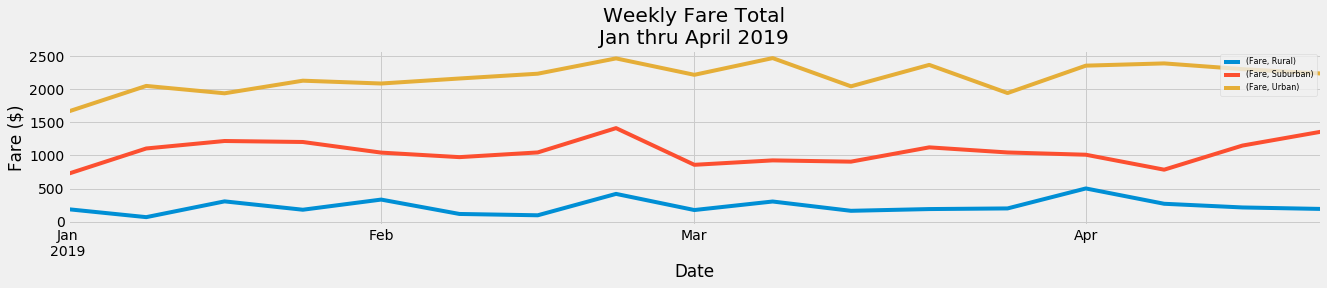

In [123]:
weekly_df.plot.line()
plt.style.use('fivethirtyeight')
plt.title("Weekly Fare Total\nJan thru April 2019")
plt.ylabel("Fare ($)")

plt.legend(loc=1, prop={'size':8})
plt.rcParams["figure.figsize"] = (20,3)

# Save the figure.
plt.savefig("analysis/WeeklyFareTotal.png")
plt.show()
